 ## 하이퍼파라미터 튜닝 정리

- BayesianOptimization:

    - pbounds: 파라미터의 범위를 정의합니다.
    - init_points: 초기 무작위 평가 횟수를 지정합니다.
    - n_iter: 최적화를 위한 반복 횟수입니다.
    - acq: 획득 함수를 설정합니다. ('ucb', 'ei', 'poi' 등이 있습니다.)

- RandomizedSearchCV:

    - param_distributions: 검색할 파라미터의 분포를 정의합니다.
    - n_iter: 파라미터 설정의 수를 지정합니다.
    - scoring: 모델을 평가할 점수 기준입니다.
    - cv: 교차 검증 분할 수를 설정합니다.

- GridSearchCV:

    - param_grid: 파라미터 그리드를 정의하여 검색할 파라미터의 값들을 설정합니다.
    - scoring: 평가 방식을 정의합니다.
    - cv: 교차 검증을 위한 분할 개수를 지정합니다.

## Randomforest 하이퍼파라미터 정리
1. **n_estimators**:
   - 결정 트리의 개수를 의미합니다.
   - 기본값은 100입니다.
   - 트리의 수를 늘릴수록 모델의 성능은 일반적으로 향상되지만, 계산 비용도 증가합니다.

2. **criterion**:
   - 분할의 품질을 측정하는 기능입니다.
   - 분류에 사용되는 기준은 "gini" (지니 불순도) 또는 "entropy" (정보 이득)이 될 수 있습니다.
   - 기본값은 "gini"입니다.

3. **max_depth**:
   - 트리의 최대 깊이입니다.
   - 너무 깊은 트리는 과적합을 일으킬 수 있습니다.
   - 기본값은 None으로, 모든 리프 노드가 순수하거나 min_samples_split보다 적은 수의 샘플을 가질 때까지 노드가 확장됩니다.

4. **min_samples_split**:
   - 노드를 분할하기 위해 필요한 최소 샘플 수입니다.
   - 기본값은 2입니다.

5. **min_samples_leaf**:
   - 리프 노드가 가져야 하는 최소 샘플 수입니다.
   - 기본값은 1입니다.

6. **min_weight_fraction_leaf**:
   - 리프 노드가 가지고 있어야 하는 샘플의 최소 가중치 합의 비율입니다.
   - 기본값은 0입니다.

7. **max_features**:
   - 각 분할에서 고려할 특성의 수입니다.
   - 옵션은 "auto", "sqrt", "log2" 또는 None 또는 정수입니다.
   - 기본값은 "auto"로, 분류에서는 sqrt(n_features), 회귀에서는 n_features입니다.

8. **max_leaf_nodes**:
   - 리프 노드의 최대 수입니다.
   - 기본값은 None으로, 리프 노드의 수에 제한이 없습니다.

9. **min_impurity_decrease**:
   - 분할로 인한 불순도 감소량의 최소값입니다.
   - 기본값은 0입니다.

10. **bootstrap**:
    - 부트스트랩 샘플을 사용할지 여부입니다.
    - 기본값은 True입니다.

11. **oob_score**:
    - 일반적으로 사용하지 않는 샘플을 사용하여 오류를 추정할지 여부입니다.
    - 기본값은 False입니다.

12. **n_jobs**:
    - 핏(fit)과 예측(predict)을 위해 병렬로 실행할 작업 수입니다.
    - 기본값은 None으로, 1개의 작업만 사용합니다. -1로 설정하면 모든 프로세서를 사용합니다.

13. **random_state**:
    - 난수 seed 설정입니다.
    - 여러 번 실행해도 동일한 결과를 얻기 위해 사용됩니다.

14. **verbose**:
    - 실행 과정 중 메시지를 출력할지 여부를 설정합니다.
    - 기본값은 0으로, 메시지를 출력하지 않습니다.

15. **warm_start**:
    - 이전 호출의 솔루션을 재사용하여 더 많은 추정기를 학습시킬지 여부입니다.
    - 기본값은 False입니다.

16. **class_weight**:
    - 클래스 가중치입니다.
    - 기본값은 None으로,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('car_evaluation.xlsx')

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

- 모델링을 하기 위해서 -> 인코딩 작업을 진행해야 한다.

In [ ]:
#원하는 피처 정리
X =df.drop(['class'],axis=1)
y =df['class']

In [ ]:
#train, test 나누기!

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [ ]:
#인코딩 작업 진행
# category_encoder

import category_encoders as ce

In [ ]:
X.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

- 레이블 인코딩 개념으로 OrdinalEncoder를 사용하자!

In [ ]:
encoder = ce.OrdinalEncoder(cols= ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [ ]:
#인코더 모듈로 trian, test 정리
X_train=encoder.fit_transform(X_train)
X_test =encoder.fit_transform(X_test)

## RandomForest 모델 진행

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=10, random_state=111) #rfc1모델

In [ ]:
#학습시키고 예측값 확인

rfc1.fit(X_train, y_train)
y_pred1_train =rfc1.predict(X_train) #train값 예측
y_pred1_test = rfc1.predict(X_test) #test값 예측

In [ ]:
#정확도 확인하기
#train, test 학습 정확도
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred1_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred1_test)))

모델 정확도 train 0.9950
모델 정확도 test 0.5087


- 정확도나 다른 평가지표 점수를 개선하기 위해서는
- 모델링에서 올릴 수 있다.
- 하이퍼파라미터를 튜닝하는 작업 이전에 -> 모델에 하이퍼파라미터를 이용해서 성능을 올리고, 올린다는 것이 확인이 되면
- 그 하이퍼파라미터가 어떤 값이 최적인지를 찾기 위해서 -> 서치작업을 진행하는 것 !

## RF 모델의 튜닝을 통해 정확도가 올라가는지 확인해 보자!

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=200, random_state=111) #rfc1모델


rfc2.fit(X_train, y_train)
y_pred2_train =rfc2.predict(X_train) #train값 예측
y_pred2_test = rfc2.predict(X_test) #test값 예측

In [ ]:
#정확도 확인하기 rfc2
#train, test 학습 정확도 (하이퍼파라미터를 200개 조정)
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred2_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred2_test)))

모델 정확도 train 1.0000
모델 정확도 test 0.5106


### max_depth를 조정해서 추가로 다시 작업

In [ ]:
rfc3 = RandomForestClassifier(n_estimators=200, max_depth=5 ,random_state=111) #rfc1모델

rfc3.fit(X_train, y_train)
y_pred3_train =rfc3.predict(X_train) #train값 예측
y_pred3_test = rfc3.predict(X_test) #test값 예측

In [ ]:
#정확도 확인하기 rfc3
#train, test 학습 정확도 (하이퍼파라미터를 200개 조정, max_depth= 5로 조정)
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred3_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred3_test)))

모델 정확도 train 0.8147
모델 정확도 test 0.5896


## RF의 피처 중요도 확인하기

In [ ]:
feature_score = pd.Series(rfc3.feature_importances_, index= X_train.columns).sort_values(ascending=False)

In [ ]:
feature_score

safety      0.374250
persons     0.344959
buying      0.102883
maint       0.084194
lug_boot    0.064433
doors       0.029281
dtype: float64

<Axes: >

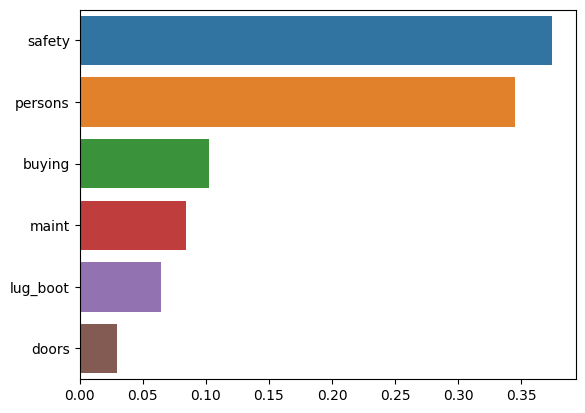

In [ ]:
sns.barplot(x= feature_score, y=feature_score.index)

- 정확도 외에 다른 값들도 한 번 비교해 보자!

In [ ]:
#평가지표를 확인하기 위한 모듈
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
print(classification_report(y_test, y_pred3_test))

              precision    recall  f1-score   support

         acc       0.11      0.11      0.11       104
        good       0.00      0.00      0.00        22
       unacc       0.70      0.79      0.74       372
       vgood       0.00      0.00      0.00        21

    accuracy                           0.59       519
   macro avg       0.20      0.22      0.21       519
weighted avg       0.52      0.59      0.55       519



/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RF 하이퍼파라미터 튜닝 -> Search 작업을 진행

- GridSearch
- BayesianOpimization

In [ ]:
from sklearn.model_selection import GridSearchCV #이 모듈을 통해서 서칭을 하는 것

#하이퍼 파라미터를 지정, 그 안에 값을 grid range를 설정해서 줘야 한다.

params = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,5,10]
}

rf_clf = RandomForestClassifier(n_estimators=200, random_state=111)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv= 5 )
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=111),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 5, 10]})

In [ ]:
params

{'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 5, 10]}

In [ ]:
print(grid_cv.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1}


In [ ]:
print('{0:.4f}'.format(grid_cv.best_score_))

0.8776


In [ ]:
rfc4 = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=1 ,random_state=111) #rfc1모델

rfc4.fit(X_train, y_train)
y_pred4_train =rfc4.predict(X_train) #train값 예측
y_pred4_test = rfc4.predict(X_test) #test값 예측

In [ ]:
#정확도 확인하기 rfc4 하이퍼파라미터 튜닝한 값
#train, test 학습 정확도 (하이퍼파라미터를 200개 조정, max_depth= 15로 조정, min_samples_leaf=1)
from sklearn.metrics import accuracy_score
print('모델 정확도 train {0:0.4f}'.format(accuracy_score(y_train, y_pred4_train)))
print('모델 정확도 test {0:0.4f}'.format(accuracy_score(y_test, y_pred4_test)))

모델 정확도 train 1.0000
모델 정확도 test 0.5106


- ### 필수과제1번의 상황
- 이런 경우는?
- 이런 식으로 오히려 성능이 떨어지는 값이 나왔다?
- 하이퍼파라미터를 다시 조정해서 기준값을 간격을 좁히는 방법
- 다시 한 번 하나의 rfc를 튜닝한 값을 돌려서 grid에 첫 학습지점을 변경해 준다.

In [ ]:
#베이지안에 필요한 모듈 불러오기
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [ ]:
# 하나의 함수를 만들어서 베이지안 그리드 진행

def rf_eval(n_estimators, max_depth, min_samples_leaf):
    rfc = RandomForestClassifier(
    n_estimators = int(n_estimators),
    max_depth = int(max_depth),
    min_samples_leaf = int(min_samples_leaf))

    return cross_val_score(rfc, X_train, y_train, scoring= 'accuracy', cv=5).mean()

optimizer = BayesianOptimization(
                f = rf_eval,
                pbounds={
                    'n_estimators':(100,300),
                    'max_depth':(10,30),
                    'min_samples_leaf':(2,10),
                }, random_state=111)

In [ ]:
optimizer.maximize(n_iter=20, init_points=5)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.8536    | 22.24     | 3.353     | 187.2     |
| 2         | 0.8313    | 25.39     | 4.363     | 129.8     |
| 3         | 0.8188    | 10.45     | 5.362     | 147.7     |
| 4         | 0.8023    | 16.75     | 9.926     | 147.5     |
| 5         | 0.8098    | 11.62     | 7.357     | 224.2     |
| 6         | 0.861     | 28.47     | 2.0       | 187.3     |
| 7         | 0.794     | 30.0      | 10.0      | 196.7     |
| 8         | 0.8594    | 26.55     | 2.0       | 181.6     |
| 9         | 0.861     | 14.98     | 2.0       | 177.0     |
| 10        | 0.7957    | 10.48     | 9.876     | 180.2     |
| 11        | 0.8594    | 21.24     | 2.0       | 174.2     |
| 12        | 0.8635    | 14.07     | 2.0       | 167.9     |
| 13        | 0.8635    | 30.0      | 2.0       | 164.6     |
| 14        | 0.7973    | 30.0      | 10.0      | 169.8     |
| 15    

## 필수과제1
- GridSearchCV에 성능이 모델 정확도 test 0.5106 더 안 좋아진 상황
- GridSearchCV의 성능을 더 올리기 위해서 하이퍼파라미터를 찾고 -> 실제로 0.5106보다 더 높은 성능을 보여주는 하이퍼파라미터 값을 찾아주세요!
- 하이퍼파라미터는 기존의 3개 외에 추가하실 분은 더 추가하셔도 됩니다!